# Analyzing Results for Non-Standardized Data

In [2]:
import pandas as pd
import numpy as np
#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
#Statistical Analysis
from numpy.random import seed
from numpy.random import randn
from scipy.stats import friedmanchisquare

# Import files
import glob

In [3]:
path = "../Results/No scaler/*.csv"
models_ns = []
for fname in glob.glob(path):
    df=pd.read_csv(fname)
    models_ns.append(df)
    my_list=list(df.columns)
    print(len(my_list),my_list)

3 ['folder_name', 'AVE_Bagging_auc', 'AVE_Bagging_avgprecision']
3 ['folder_name', 'SOD_auc', 'SOD_avgprecision']
3 ['folder_name', 'VAE_auc', 'VAE_avgprecision']
3 ['folder_name', 'MAX_Bagging_auc', 'MAX_Bagging_avgprecision']
3 ['folder_name', 'OCSVM_auc', 'OCVM_avgprecision']
3 ['folder_name', 'MO_GAAL_auc', 'MO_GAAL_avgprecision']
3 ['folder_name', 'COPOD_auc', 'COPOD_avgprecision']
3 ['folder_name', 'LSCP_auc', 'LSCP_avgprecision']
3 ['folder_name', 'PCA_auc', 'PCA_avgprecision']
3 ['folder_name', 'Avg_KNN_auc', 'Avg_KNN_avgprecision']
3 ['folder_name', 'Median_KNN_auc', 'Median_KNN_avgprecision']
3 ['folder_name', 'MCD_auc', 'MCD_avgprecision']
3 ['folder_name', 'ISOF_auc', 'ISOF_avgprecision']
3 ['folder_name', 'BRM_auc', 'BRM_avgprecision']
3 ['folder_name', 'Largest_KNN_auc', 'Largest_KNN_avgprecision']
3 ['folder_name', 'AE_auc', 'AE_avgprecision']
3 ['folder_name', 'SO_GAAL_auc', 'SO_GAAL_avgprecision']
3 ['folder_name', 'CBLOF_auc', 'CBLOF_avgprecision']
3 ['folder_name', '

In [4]:
# Separate AUC and Precision 
from functools import reduce
def separate_performance(models):
    join_models = pd.concat(
    (dataframe.set_index('folder_name') for dataframe in models_ns),
    axis=1, join='inner' ).reset_index()
    auc_df = join_models.loc[:, join_models.columns.str.endswith('auc')]
    avg_prec_df = join_models.loc[:, join_models.columns.str.endswith('avgprecision')]
    return join_models, auc_df,avg_prec_df

In [5]:
join_models,df_auc_ns,df_avg_precision_ns  = separate_performance(models_ns)

In [6]:
models_ns_names = df_auc_ns.columns.tolist()
models_ns_names = [i.rstrip('_auc') for i in models_ns_names]

In [8]:
dataset_names = join_models['folder_name']
pd.set_option('display.max_rows', 100)
dataset_names

0             abalone-17_vs_7-8-9-10
1          abalone-19_vs_10-11-12-13
2               abalone-20_vs_8-9-10
3                    abalone-21_vs_8
4                    abalone-3_vs_11
5                          abalone19
6                        abalone9-18
7                           car-good
8                          car-vgood
9                   cleveland-0_vs_4
10                     dermatology-6
11              ecoli-0-1-3-7_vs_2-6
12                ecoli-0-1-4-6_vs_5
13          ecoli-0-1-4-7_vs_2-3-5-6
14              ecoli-0-1-4-7_vs_5-6
15                ecoli-0-1_vs_2-3-5
16                    ecoli-0-1_vs_5
17                ecoli-0-2-3-4_vs_5
18              ecoli-0-2-6-7_vs_3-5
19                ecoli-0-3-4-6_vs_5
20              ecoli-0-3-4-7_vs_5-6
21                  ecoli-0-3-4_vs_5
22                  ecoli-0-4-6_vs_5
23                ecoli-0-6-7_vs_3-5
24                  ecoli-0-6-7_vs_5
25                      ecoli-0_vs_1
26                            ecoli1
2

In [7]:
# Plot Performance Metrics
def plot_metrics(df, title = 'Classifiers AUC Evaluation', y_label = 'AUC', list_names =[]):
    plt.figure(figsize=(25, 20))
    box = plt.boxplot(df,
                patch_artist=True, # to fill with color
                notch='True', # notch shape
                labels=list_names) # the labels to use
    plt.title(title, fontsize=25)
    plt.ylabel(y_label, fontsize=20)
    plt.xticks(rotation=90, fontsize = 15)
    plt.yticks(fontsize = 15)
    # fill with different colors
    colors = ['blue', 'orchid','peru', 'green', 'teal','wheat','red', 'indigo', 'brown', 'pink',
                'grey','magenta','limegreen','lightsteelblue','royalblue','navy','slateblue','aquamarine','tan','lightcoral',
                'salmon','khaki','darkslategray','lawngreen','purple','azure','darkseagreen','rosybrown','orange']
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
    return plt.show()

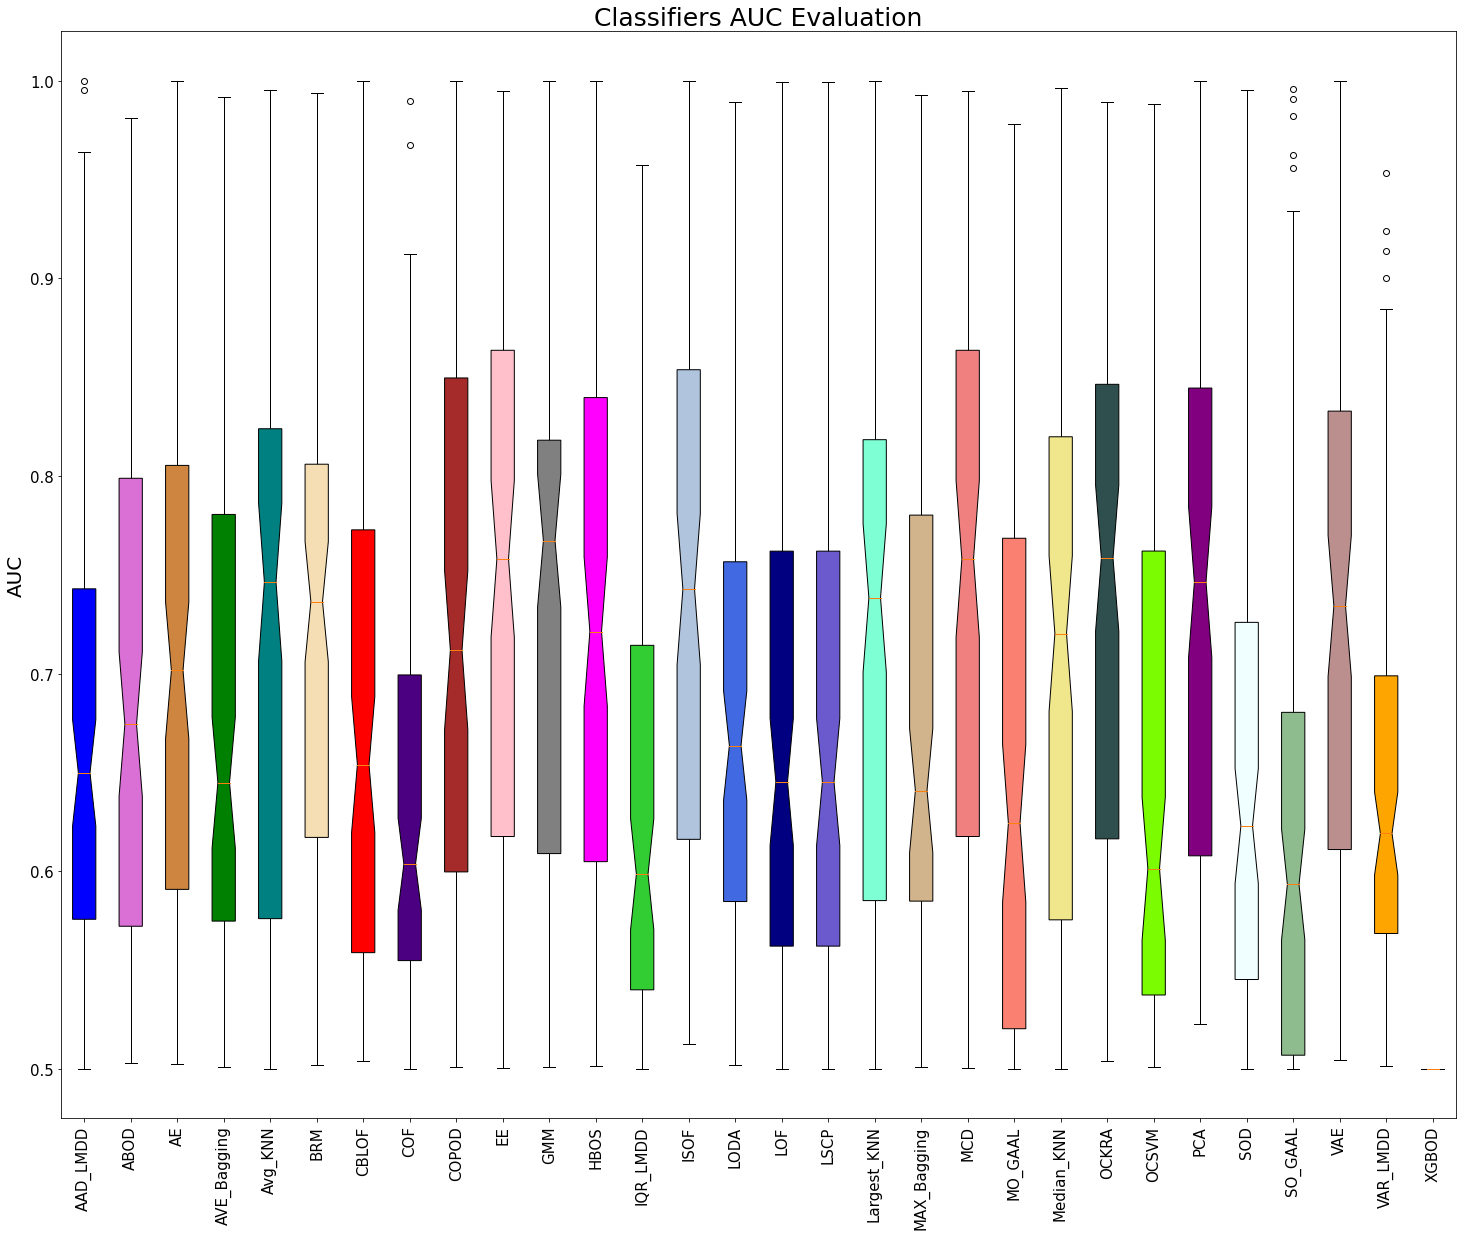

In [8]:
df_auc2 = df_auc_ns.reindex(sorted(df_auc_ns.columns), axis=1)
plot_metrics(df_auc2,title = 'Classifiers AUC Evaluation', y_label = 'AUC', list_names =[i.rstrip('_mm_auc') for i in df_auc2.columns.tolist()])

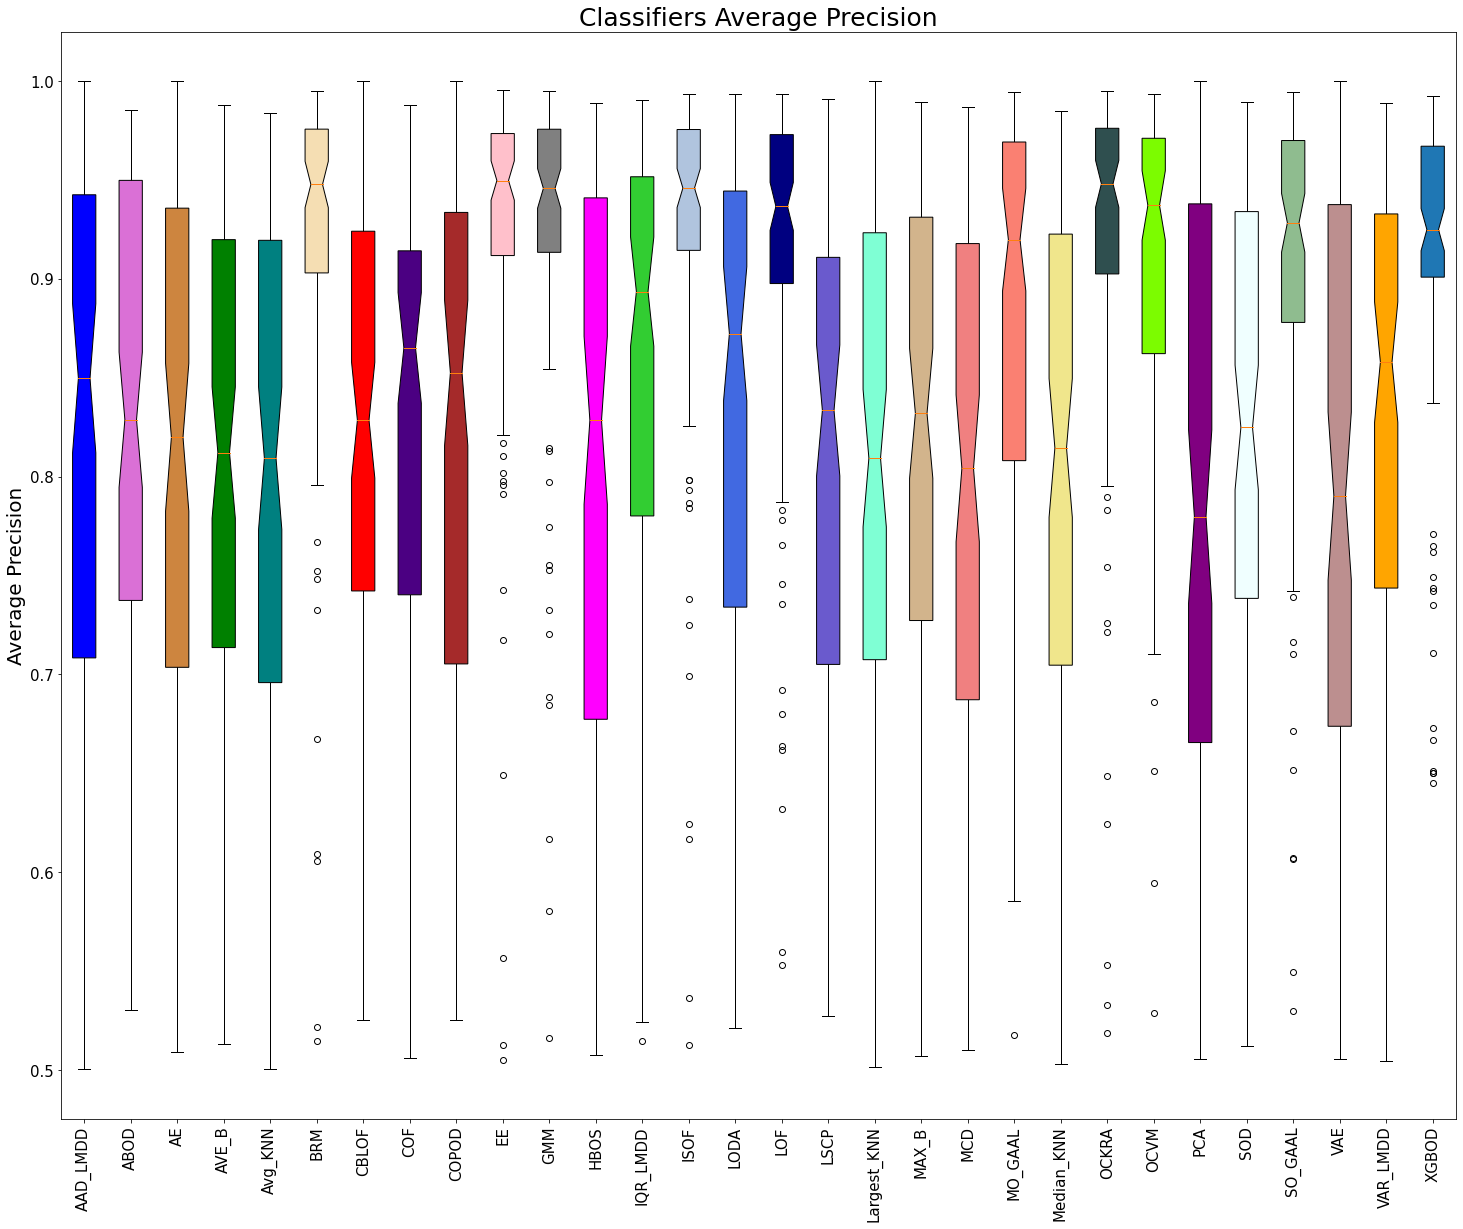

In [9]:
df_avg_precision2 = df_avg_precision_ns.reindex(sorted(df_avg_precision_ns.columns), axis=1)
plot_metrics(df_avg_precision2 , 'Classifiers Average Precision' , 'Average Precision' , list_names =[i.rstrip('_mm_avgprecision') for i in df_avg_precision2.columns.tolist()])


In [10]:
mean_auc = df_auc_ns.mean()
mean_avg = df_avg_precision_ns.mean()
# Save the object in a python file
import pickle
with open('ns_mean_auc.data','wb') as data:
    pickle.dump(mean_auc, data)
with open('ns_mean_avg.data','wb') as data:
    pickle.dump(mean_avg, data)

# Hypothesis Testing

Comparing multiple classifiers over multiple datasets

In [11]:
#!pip install Orange3
#!pip install scipy
#!pip install autorank
#!pip install scikit_posthocs

In [12]:
from scipy.stats import friedmanchisquare , rankdata
from Orange.evaluation import compute_CD, graph_ranks
from autorank import autorank, plot_stats, create_report, latex_table
import scikit_posthocs as sp

In [13]:
# dataset names
df_auc_ns['dataset_names'] = dataset_names
df_avg_precision_ns['dataset_names'] = dataset_names
# algorithms names
algorithms_names_auc =df_auc_ns.drop('dataset_names', axis=1).columns
algorithms_names_avg =df_avg_precision_ns.drop('dataset_names', axis=1).columns

In [14]:
performances_array = df_auc_ns[algorithms_names_auc].values
# Finally, we apply the Friedman test.
friedmanchisquare(*performances_array)

FriedmanchisquareResult(statistic=1174.1748983616424, pvalue=4.8560900445092614e-186)

In [15]:
def friedman_test(*args):
    stat, p = friedmanchisquare(*args)
    print('Statistics=%.3f, p=%.4E' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        return 'Fail to reject H0'
    else:
	    return 'Reject H0'

In [16]:
# For AUC
*a, = [df_auc_ns.iloc[:,i] for i in range(len(df_auc_ns.drop('dataset_names', axis=1).columns))]
a_np = np.array(a) # Here the columns correspond to the blocking factor (datasets) and the rows to the algorithms
a_np = a_np.T # Here the rows correspond to the blocking factor (datasets) and the columns correspond to the primary factor (algorithms)
friedman_test(*a_np)

Statistics=1174.175, p=4.8561E-186


'Reject H0'

In [17]:
# For Average Precision
*b, = [df_avg_precision_ns.iloc[:,i] for i in range(len(df_avg_precision_ns.drop('dataset_names', axis=1).columns))]
b_np = np.array(b) # Here the columns correspond to the blocking factor (datasets) and the rows to the algorithms
b_np = b_np.T # Here the rows correspond to the blocking factor (datasets) and the columns correspond to the primary factor (algorithms)
friedman_test(*b_np)

Statistics=1741.885, p=1.8925E-301


'Reject H0'

## Rankings 

In [18]:
ranks_auc = np.array([rankdata(-p) for p in a_np])
ranks_avg_precision = np.array([rankdata(-p) for p in b_np])

In [19]:
ranks_auc_df = pd.DataFrame(ranks_auc, columns = algorithms_names_auc)

In [20]:
ranks_avg_precision_df = pd.DataFrame(ranks_avg_precision, columns = algorithms_names_avg)

In [21]:
# Calculating the average ranks.
average_ranks_auc = np.average(ranks_auc, axis=0)
print('\n'.join('{} average rank: {}'.format(a, r) for a, r in zip(algorithms_names_auc, average_ranks_auc)))

AVE_Bagging_auc average rank: 16.46315789473684
SOD_auc average rank: 19.068421052631578
VAE_auc average rank: 12.421052631578947
MAX_Bagging_auc average rank: 16.66315789473684
OCSVM_auc average rank: 17.51578947368421
MO_GAAL_auc average rank: 17.894736842105264
COPOD_auc average rank: 12.631578947368421
LSCP_auc average rank: 17.54736842105263
PCA_auc average rank: 11.094736842105263
Avg_KNN_auc average rank: 12.257894736842106
Median_KNN_auc average rank: 13.657894736842104
MCD_auc average rank: 9.963157894736842
ISOF_auc average rank: 11.31578947368421
BRM_auc average rank: 12.236842105263158
Largest_KNN_auc average rank: 12.68421052631579
AE_auc average rank: 14.547368421052632
SO_GAAL_auc average rank: 19.18421052631579
CBLOF_auc average rank: 17.9
ABOD_auc average rank: 16.757894736842104
LOF_auc average rank: 17.526315789473685
LODA_auc average rank: 16.242105263157896
AAD_LMDD_auc average rank: 16.378947368421052
EE_auc average rank: 9.921052631578947
GMM_auc average rank: 12

In [22]:
result_auc = autorank(df_auc_ns.drop('dataset_names',axis = 1), alpha=0.05, verbose=False)
print(result_auc)

RankResult(rankdf=
                  meanrank    median        mad  ci_lower  ci_upper  \
EE_auc            9.921053   0.75806   0.183019  0.628648  0.863399   
MCD_auc           9.963158   0.75806   0.183019  0.628648  0.863399   
PCA_auc          11.094737   0.74633    0.17931  0.627227  0.840511   
ISOF_auc         11.315789  0.742757   0.174818  0.625719  0.852462   
OCKRA_auc        11.768421  0.758443   0.171779  0.623506  0.845221   
GMM_auc          12.194737  0.767297   0.162769  0.625914  0.815264   
BRM_auc          12.236842  0.736378   0.127556  0.626798   0.80525   
Avg_KNN_auc      12.257895  0.746307   0.167303  0.587638  0.823352   
VAE_auc          12.421053  0.734206   0.174184  0.615462  0.832451   
HBOS_auc         12.452632   0.72132    0.17293  0.627413  0.837062   
COPOD_auc        12.631579  0.711905   0.175174  0.624709   0.84488   
Largest_KNN_auc  12.684211  0.738355   0.182027   0.59302  0.817845   
Median_KNN_auc   13.657895   0.72027   0.162821  0.583188 

In [23]:
create_report(result_auc)
#latex_table(result_auc)

The statistical analysis was conducted for 30 populations with 95 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We rejected the null hypothesis that the population is normal for the populations EE_auc (p=0.000), MCD_auc (p=0.000), PCA_auc (p=0.001), ISOF_auc (p=0.000), OCKRA_auc (p=0.000), GMM_auc (p=0.000), BRM_auc (p=0.001), Avg_KNN_auc (p=0.000), VAE_auc (p=0.001), HBOS_auc (p=0.001), COPOD_auc (p=0.001), AAD_LMDD_auc (p=0.000), AVE_Bagging_auc (p=0.000), MAX_Bagging_auc (p=0.000), ABOD_auc (p=0.001), OCSVM_auc (p=0.000), LSCP_auc (p=0.002), SOD_auc (p=0.000), SO_GAAL_auc (p=0.000), COF_auc (p=0.000), and IQR_LMDD_auc (p=0.001). Therefore, we assume that not all populations are normal.
Because we have more than two populations and the populations and some of them are not normal, we use the non-parametric Friedman test as omnibus test to determine if there are any significant differences between the median values of the populations. We use the post-h

In [24]:
# Calculating the average ranks.
average_ranks_avg_precision = np.average(ranks_avg_precision, axis=0)
print('\n'.join('{} average rank: {}'.format(a, r) for a, r in zip(algorithms_names_avg, average_ranks_avg_precision)))

AVE_Bagging_avgprecision average rank: 19.48421052631579
SOD_avgprecision average rank: 17.71578947368421
VAE_avgprecision average rank: 19.55263157894737
MAX_Bagging_avgprecision average rank: 18.905263157894737
OCVM_avgprecision average rank: 10.842105263157896
MO_GAAL_avgprecision average rank: 11.868421052631579
COPOD_avgprecision average rank: 17.99473684210526
LSCP_avgprecision average rank: 19.0
PCA_avgprecision average rank: 19.75263157894737
Avg_KNN_avgprecision average rank: 20.68421052631579
Median_KNN_avgprecision average rank: 20.073684210526316
MCD_avgprecision average rank: 21.305263157894736
ISOF_avgprecision average rank: 8.0
BRM_avgprecision average rank: 7.942105263157894
Largest_KNN_avgprecision average rank: 19.778947368421054
AE_avgprecision average rank: 17.63684210526316
SO_GAAL_avgprecision average rank: 11.089473684210526
CBLOF_avgprecision average rank: 17.0
ABOD_avgprecision average rank: 17.46315789473684
LOF_avgprecision average rank: 9.805263157894737
LOD

In [25]:
result_avg = autorank(df_avg_precision_ns.drop('dataset_names',axis = 1), alpha=0.05, verbose=False)
print(result_avg)

RankResult(rankdf=
                           meanrank    median        mad  ci_lower  ci_upper  \
EE_avgprecision            6.852632    0.9497  0.0386084  0.921168  0.973417   
OCKRA_avgprecision         7.694737  0.948017  0.0453962  0.917886  0.975454   
GMM_avgprecision           7.726316  0.945715   0.044546  0.917959   0.97555   
BRM_avgprecision           7.942105    0.9477  0.0458117  0.906458  0.975656   
ISOF_avgprecision          8.000000  0.945884  0.0447673  0.919056  0.975478   
LOF_avgprecision           9.805263  0.936605  0.0549231  0.903776  0.972647   
XGBOD_avgprecision        10.842105  0.924855  0.0556402  0.901163  0.966854   
OCVM_avgprecision         10.842105  0.937098  0.0646789  0.874275  0.969793   
SO_GAAL_avgprecision      11.089474  0.928315  0.0631604   0.89011  0.969767   
MO_GAAL_avgprecision      11.868421  0.919814  0.0830136  0.837209   0.96856   
IQR_LMDD_avgprecision     15.447368  0.893515   0.108504  0.782697  0.950384   
LODA_avgprecision    

In [26]:
create_report(result_avg)
#latex_table(result_avg)

The statistical analysis was conducted for 30 populations with 95 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We rejected the null hypothesis that the population is normal for the populations EE_avgprecision (p=0.001), OCKRA_avgprecision (p=0.000), GMM_avgprecision (p=0.000), BRM_avgprecision (p=0.000), ISOF_avgprecision (p=0.000), LOF_avgprecision (p=0.000), XGBOD_avgprecision (p=0.000), OCVM_avgprecision (p=0.001), SO_GAAL_avgprecision (p=0.000), MO_GAAL_avgprecision (p=0.001), IQR_LMDD_avgprecision (p=0.000), LODA_avgprecision (p=0.000), CBLOF_avgprecision (p=0.000), ABOD_avgprecision (p=0.000), SOD_avgprecision (p=0.000), COF_avgprecision (p=0.000), COPOD_avgprecision (p=0.001), VAR_LMDD_avgprecision (p=0.000), AAD_LMDD_avgprecision (p=0.000), MAX_Bagging_avgprecision (p=0.000), LSCP_avgprecision (p=0.000), HBOS_avgprecision (p=0.000), AVE_Bagging_avgprecision (p=0.000), VAE_avgprecision (p=0.000), PCA_avgprecision (p=0.000), Largest_KNN_avgpreci

In [27]:
df_ranking_avg_auc = pd.DataFrame(average_ranks_auc, index = algorithms_names_auc)
df_ranking_avg_auc.columns = ['auc']
df_ranking_avg_avgprecision = pd.DataFrame(average_ranks_avg_precision, index = algorithms_names_avg)
df_ranking_avg_avgprecision.columns = ['average_precision']

In [28]:
blocks = sp.__convert_to_block_df(a_np)
blocks

(      blocks groups         y
 0          0      0  0.815948
 1          1      0  0.640645
 2          2      0  0.869597
 3          3      0  0.893172
 4          4      0  0.951814
 ...      ...    ...       ...
 2845      90     29  0.500000
 2846      91     29  0.500000
 2847      92     29  0.500000
 2848      93     29  0.500000
 2849      94     29  0.500000
 
 [2850 rows x 3 columns],
 'y',
 'groups',
 'blocks')

## Post-Hoc Evaluation

In [29]:
#!pip install pymannkendall

In [30]:
# Post-hoc analysis
import scikit_posthocs as sp
from scikit_posthocs import posthoc_nemenyi_friedman as nemenyi
import scipy as sp
import scipy.stats as st
import itertools as it
import sys
sys.path.append('/Volumes/GoogleDrive/My Drive/MCCNotes/Jlab projects/GITHUB_repositories/Clones/stac/stac/')
# Or you could import the module as a whole,
#from nonparametric_tests import shaffer_multitest,friedman_test,nemenyi_multitest

In [31]:
ev_auc = df_auc_ns.drop('dataset_names',axis = 1).copy()
ev_avg = df_avg_precision_ns.drop('dataset_names', axis = 1).copy()
ev_auc.columns = [i.rstrip('_auc') for i in ev_auc.columns]
ev_avg.columns = [i.rstrip('_avgprecision') for i in ev_avg.columns ]

In [32]:
ny_auc = nemenyi(ev_auc)

Text(0.5, 1.0, 'AUC Signifcant Difference with Nemenyi')

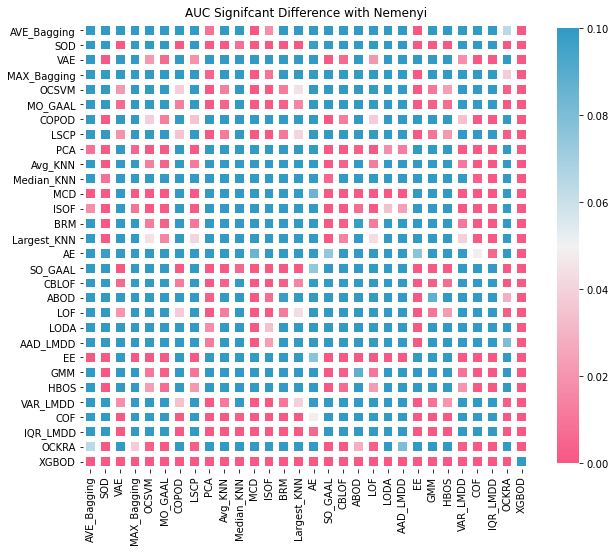

In [33]:
plt.figure(figsize=(10, 10))
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
ax = sns.heatmap(ny_auc, annot=False, fmt=".1f", 
           linewidths=5, cmap=cmap, vmin=0, vmax=0.1, 
           cbar_kws={"shrink": .8}, square=True)
plt.title('AUC Signifcant Difference with Nemenyi')

In [34]:
ny_avg = nemenyi(ev_avg)


Text(0.5, 1.0, 'Average Precision Signifcant Difference with Nemenyi')

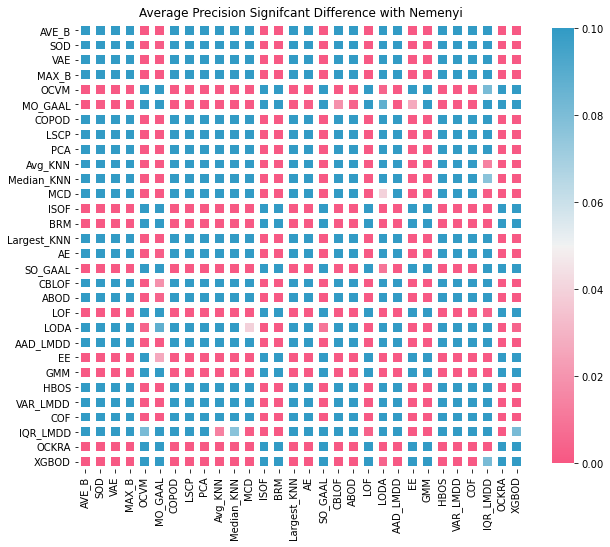

In [35]:
plt.figure(figsize=(10, 10))
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
ax = sns.heatmap(ny_avg, annot=False, fmt=".1f", 
           linewidths=5, cmap=cmap, vmin=0, vmax=0.1, 
           cbar_kws={"shrink": .8}, square=True)
plt.title('Average Precision Signifcant Difference with Nemenyi')

## CD Diagram

In [36]:
def compute_CD_diagram(cd , ranks,metric ,names):
    # Critical difference for Nemenyi test with alpha=0.05.
    graph_ranks(ranks,
    names=names,
    cd=cd,
    width=10,
    textspace=1.5,
    reverse=True)
    title = str(metric) + ' CD Diagram for Nemenyi Test'
    plt.title(title)
    plt.show()
    # Critical difference for Bonferroni-Dunn test with alpha=0.05.
    graph_ranks(ranks,
    names=names,
    cd=cd,
    cdmethod=0,
    width=10,
    textspace=1.5,
    reverse=True)
    plt.title(str(metric)  +' CD Diagram for Bonferroni-Dunn Test')
    plt.show()

In [37]:
cd_auc1= compute_CD(average_ranks_auc[0:20],
n=len(df_auc_ns.iloc[:,0:20]),
alpha='0.05',
test='nemenyi')

In [38]:
algorithms_names_auc = [i.rstrip('_auc') for i in algorithms_names_auc]
algorithms_names_avg  = [i[:-13] for i in algorithms_names_avg]

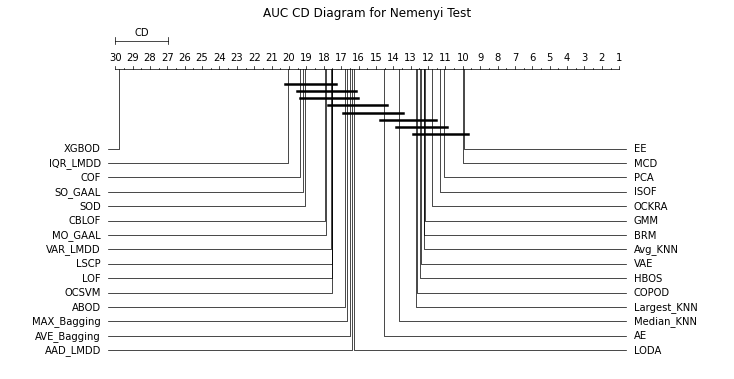

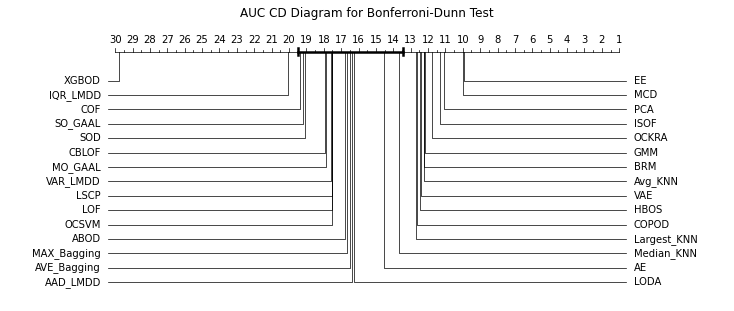

In [39]:
compute_CD_diagram(cd_auc1,average_ranks_auc, 'AUC', algorithms_names_auc)

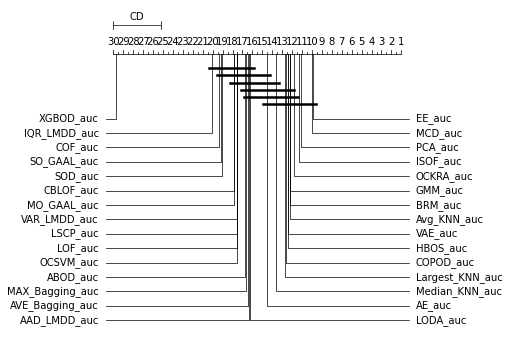

In [40]:
plot_stats(result_auc)
plt.show()

In [41]:
cd_avg1= compute_CD(average_ranks_avg_precision[0:20],
n=len(df_avg_precision_ns.iloc[:,0:20]),
alpha='0.05',
test='nemenyi')

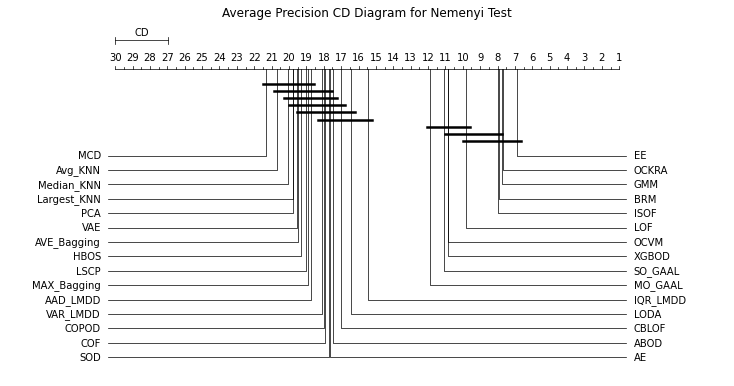

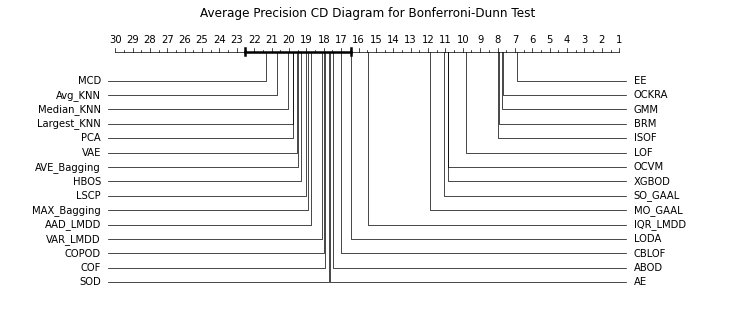

In [42]:
compute_CD_diagram(cd_avg1,average_ranks_avg_precision, 'Average Precision', algorithms_names_avg)

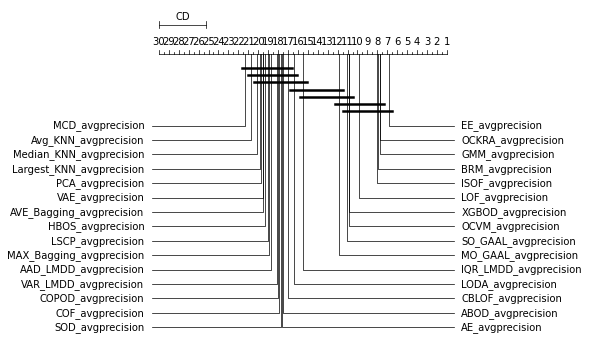

In [43]:
plot_stats(result_avg)
plt.show()

## 2D Diagram|

In [44]:
#!pip install adjustText

In [54]:
import random
from adjustText import adjust_text
def plot_2d(df):
    # Create layer for 2D Graph
    fig = plt.figure(figsize = (20,10))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Average Ranking for AUC', fontsize = 15)
    ax.set_ylabel('Averange Ranking for Average Precision', fontsize = 15)
    ax.set_title("One-Class Classifiers' Rank", fontsize = 20)
    # Plot
    targets = df['algorithm'].unique()
    x=np.linspace(0,int(np.max(df.average_precision) +2))
    line = ax.plot(x,x,'g-') # identity line
    ax = sns.scatterplot(x = 'auc', y = 'average_precision' , hue = 'algorithm', data = df, s= 1000, alpha = 0.5, palette = 'muted')
    # zip joins x and y coordinates in pairs
    xs = df['auc']
    ys = df['average_precision']

    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.legend(frameon=True, fontsize = 10)
    texts = [plt.text(xs[i], ys[i], '%s' %targets[i], ha='center', va='center' , fontsize = 12) for i in range(len(xs))]
    adjust_text(texts)
    plt.show()
    
    return None

In [49]:
df_ranking_avg_auc.index  = [i.rstrip('_auc') for i in df_ranking_avg_auc.index ]
df_ranking_avg_avgprecision.index  = [i[:-13] for i in df_ranking_avg_avgprecision.index ]
df_rank_avg = pd.concat([df_ranking_avg_auc, df_ranking_avg_avgprecision], axis = 1)

ValueError: Shape of passed values is (60, 2), indices imply (31, 2)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


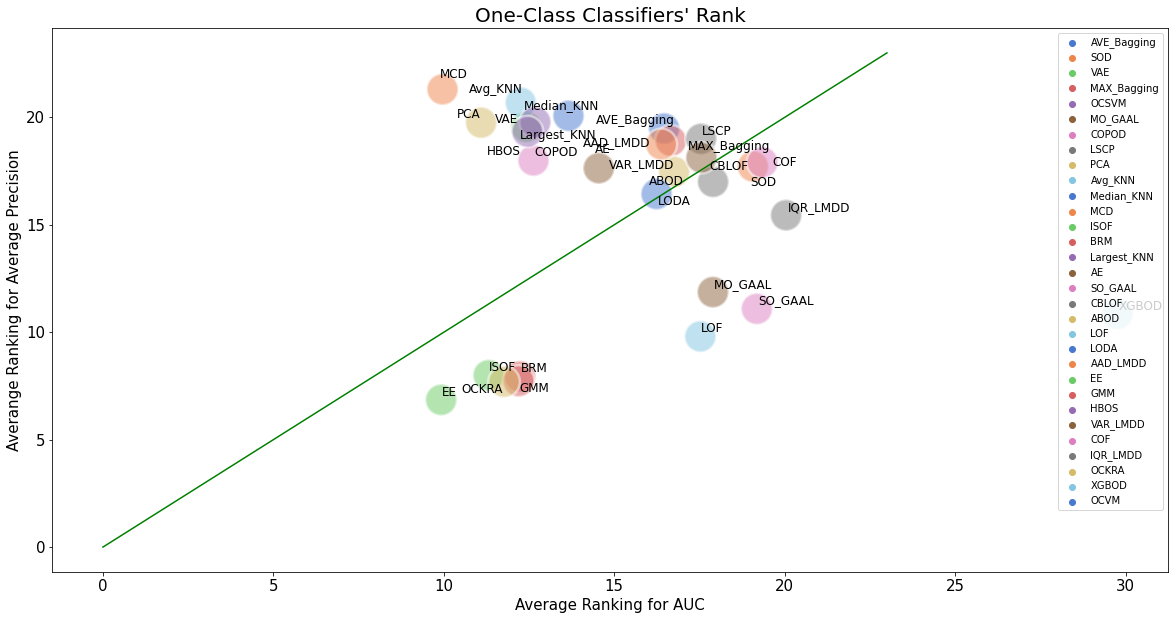

AttributeError: 'NoneType' object has no attribute 'savefig'

In [55]:
plot1 = plot_2d(df_rank_avg.reset_index().rename(columns={'index':'algorithm'}))
plot1.savefig('noscaler_rank.png')

In [48]:
#!pip install plotnine     

In [49]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg
%matplotlib inline


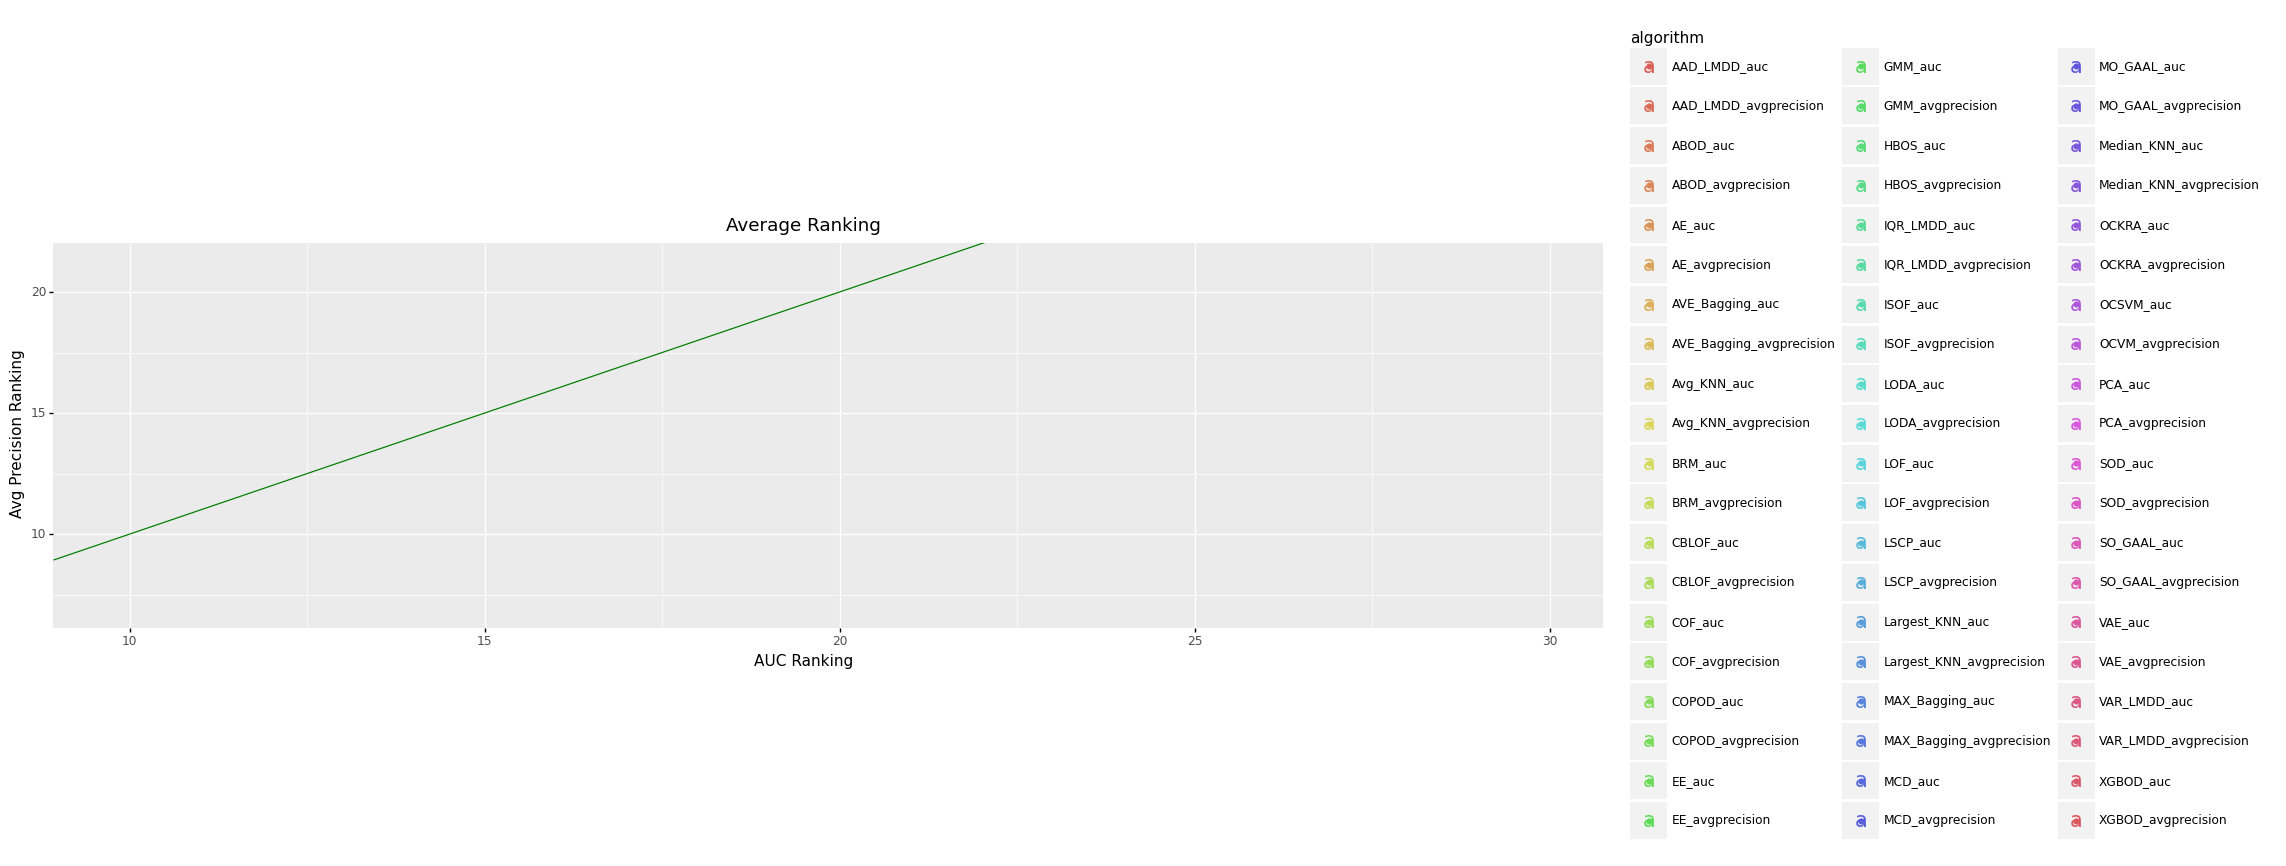

<ggplot: (8774304843635)>

In [50]:
ap = (ggplot(df_rank_avg.reset_index().rename(columns={'index':'algorithm'}))
+ aes(x='auc', y='average_precision', color='algorithm') 
+ geom_point(aes(color = 'algorithm'))
+ geom_text(aes(label = 'algorithm' ,nudge_x=0.5, nudge_y=0.5), size = 15, alpha = 1)
+ geom_abline(intercept = 0, slope = 1, color='green')
+ theme(figure_size=(20,5))
+ labs(title='Average Ranking', x='AUC Ranking', y='Avg Precision Ranking'))
ap

# All Data

In [85]:
# Load the object
import pickle
with open('ns_mean_auc.data','rb') as data:
    ns_mean_auc= pickle.load(data)
with open('ns_mean_avg.data','rb') as data:
    ns_mean_avg= pickle.load(data)
with open('mm_mean_auc.data','rb') as data:
    mm_mean_auc= pickle.load(data)
with open('mm_mean_avg.data','rb') as data:
    mm_mean_avg= pickle.load(data)
with open('std_mean_auc.data','rb') as data:
    std_mean_auc= pickle.load(data)
with open('std_mean_avg.data','rb') as data:
    std_mean_avg= pickle.load(data)

In [86]:
ns_mean_auc.index  = [i.rstrip('_auc') for i in ns_mean_auc.index ]
mm_mean_auc.index  = [i.rstrip('_mm_auc') for i in mm_mean_auc.index ]
std_mean_auc.index  = [i.rstrip('_std_auc') for i in std_mean_auc.index ]
ns_mean_auc = pd.DataFrame(ns_mean_auc, columns = ['ns_AUC'])
mm_mean_auc = pd.DataFrame(mm_mean_auc, columns = ['mm_AUC'])
std_mean_auc = pd.DataFrame(std_mean_auc, columns = ['std_AUC'])
mean_auc = pd.concat([ns_mean_auc, mm_mean_auc, std_mean_auc], axis = 1)

In [87]:
ns_mean_avg.index  = [i[:-13]  for i in ns_mean_avg.index ]
mm_mean_avg.index  = [i[:-16]  for i in mm_mean_avg.index ]
std_mean_avg.index  = [i[:-17]  for i in std_mean_avg.index ]
ns_mean_avg = pd.DataFrame(ns_mean_avg, columns = ['ns_avg'])
mm_mean_avg = pd.DataFrame(mm_mean_avg, columns = ['mm_avg'])
std_mean_avg = pd.DataFrame(std_mean_avg, columns = ['std_avg'])
mean_avg = pd.concat([ns_mean_avg, mm_mean_avg, std_mean_avg], axis = 1)

In [88]:
mean_auc.to_csv('mean_auc.csv')

In [89]:
mean_avg.to_csv('mean_avg.csv')